In [1]:
import os
import torch
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

from conditional_rate_matching.configs.config_files import ExperimentFiles

from conditional_rate_matching.models.trainers.crm_trainer import CRMTrainer

from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig,CRMTrainerConfig,BasicPipelineConfig

from conditional_rate_matching.models.metrics.metrics_utils import MetricsAvaliable

from conditional_rate_matching.models.trainers.call_all_trainers import call_trainer
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_graph import experiment_comunity_small

/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/tqdm-4.66.1-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Set Config

In [2]:
config:CRMConfig = experiment_comunity_small()

epochs = 1000

config.trainer = CRMTrainerConfig(number_of_epochs=epochs,
                                  learning_rate=1e-3,
                                  save_model_epochs=int(.1*epochs),
                                  metrics=[MetricsAvaliable.mse_histograms, 
                                           MetricsAvaliable.graphs_plot,
                                           MetricsAvaliable.marginal_binary_histograms],
                                max_test_size=100)

config.pipeline = BasicPipelineConfig(number_of_steps=100)

config.optimal_transport = OptimalTransportSamplerConfig(name="uniform")

# Create a Model

In [3]:
crm = CRM(config=config)

# Train a Model

In [4]:
experiment_files = ExperimentFiles(experiment_name="crm",
                                   experiment_type="tutorial",
                                   experiment_indentifier=None)
crm_trainer = CRMTrainer(config, experiment_files) # TRAINER CREATES MODEL FROM CONFIG FILE
results_, all_metrics = crm_trainer.train()

# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
tutorial
crm
None
# ==================================================
# Number of Epochs 1000
# ==================================================


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1000, Loss: 0.1377: 100%|██████████| 1000/1000 [00:46<00:00, 21.66it/s]


# Read and Sample from a Model

In [5]:
crm_trained = CRM(experiment_dir=experiment_files.experiment_dir)
crm_trained.config.pipeline.number_of_steps = 1000
sample_x = crm_trained.pipeline(sample_size=10,train=False)

1000it [00:02, 494.59it/s]


In [6]:
# IN THIS EXAMPLE CREATE FROM SAMPLE TO NETWORKX GRAPHS
graphs_sample = crm_trained.dataloader_1.sample_to_graph(sample_x)

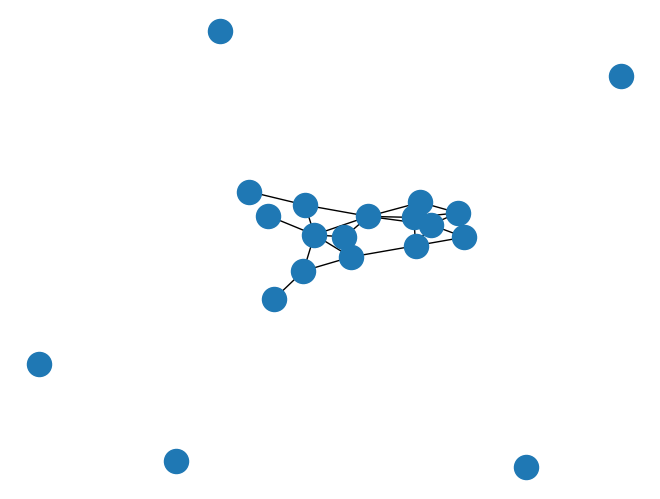

In [7]:
nx.draw(graphs_sample[6])

## Read results only (without model initialization)

In [25]:
experiment_files = ExperimentFiles(experiment_dir=experiment_files.experiment_dir)
results_ = experiment_files.load_results()
plt.plot(results_["all_training_loss"])

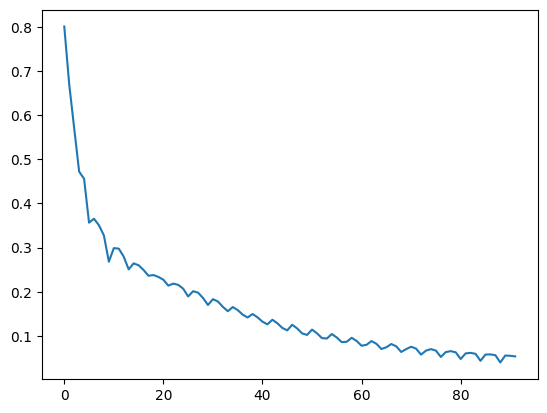

In [26]:
plt.plot(results_["all_training_loss"])

# Calculate a Metric Again

In [10]:
from conditional_rate_matching.models.metrics.metrics_utils import log_metrics, MetricsAvaliable
metrics_avaliable = MetricsAvaliable()

In [27]:
# number of samples requiered to calculate the test 
# this number should not be that big as the sample and paths are stored to perform the statistics
crm_trained.config.trainer.max_test_size = crm_trained.config.data1.test_size 
crm_trained.config.pipeline.number_of_steps = 100
crm_trained.config.data1.test_size 

20

In [28]:
metric_string = metrics_avaliable.mse_histograms
test_statistics = []
for i in range(10):
    metrics = log_metrics(crm_trained,all_metrics={},metrics_to_log={metric_string})
    print(metrics)
    test_statistics.append(metrics["mse_marginal_histograms"])
test_statistics = np.asarray(test_statistics)

100it [00:00, 524.61it/s]


{'mse_marginal_histograms': 0.0265657901763916}


100it [00:00, 488.63it/s]


{'mse_marginal_histograms': 0.011473683640360832}


100it [00:00, 483.80it/s]


{'mse_marginal_histograms': 0.02113158069550991}


100it [00:00, 445.25it/s]


{'mse_marginal_histograms': 0.018828947097063065}


100it [00:00, 349.78it/s]


{'mse_marginal_histograms': 0.009026315994560719}


100it [00:00, 462.89it/s]


{'mse_marginal_histograms': 0.014763159677386284}


100it [00:00, 469.24it/s]


{'mse_marginal_histograms': 0.013328948989510536}


100it [00:00, 457.83it/s]


{'mse_marginal_histograms': 0.00965789519250393}


100it [00:00, 462.13it/s]


{'mse_marginal_histograms': 0.012552632950246334}


100it [00:00, 452.92it/s]

{'mse_marginal_histograms': 0.013315790332853794}


In [29]:
test_statistics.mean(),test_statistics.std()

(0.015064474474638701, 0.005237514815823908)